In [68]:
# Cellule 0 : Rechargement auto des modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
# Cellule 1 : Imports et configuration des chemins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Ajouter le dossier contenant le module preprocessing
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
sys.path.append(os.path.abspath('./scripts'))

from scripts.preprocessing import preprocess_vehicle_data

In [70]:
df = preprocess_vehicle_data("../data/vehicles.csv")
df.info()
df[['year_posted', 'month_posted', 'weekday_posted']].sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 111643 entries, 0 to 117168
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   price           111643 non-null  int64  
 1   year            111643 non-null  float64
 2   manufacturer    111643 non-null  object 
 3   condition       111643 non-null  object 
 4   cylinders       111643 non-null  object 
 5   fuel            111643 non-null  object 
 6   odometer        111643 non-null  float64
 7   transmission    111643 non-null  object 
 8   drive           111643 non-null  object 
 9   type            111643 non-null  object 
 10  paint_color     111643 non-null  object 
 11  state           111643 non-null  object 
 12  title_status    111643 non-null  object 
 13  year_posted     111643 non-null  int32  
 14  month_posted    111643 non-null  int32  
 15  weekday_posted  111643 non-null  int32  
dtypes: float64(2), int32(3), int64(1), object(10)
memory usage: 1

,year_posted,month_posted,weekday_posted
32567,2021,5,5
44678,2021,4,3
30604,2021,4,3
86347,2021,4,0
54300,2021,5,5


In [71]:
# Cellule 3 : Aperçu du DataFrame
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,title_status,year_posted,month_posted,weekday_posted
0,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,automatic,rwd,truck,black,al,clean,2021,5,0
1,27990,2012.0,gmc,good,8 cylinders,gas,68696.0,other,4wd,pickup,black,al,clean,2021,5,0
2,34590,2016.0,chevrolet,good,6 cylinders,gas,29499.0,other,4wd,pickup,silver,al,clean,2021,5,0
3,35000,2019.0,toyota,excellent,6 cylinders,gas,43000.0,automatic,4wd,truck,grey,al,clean,2021,5,0
4,29990,2016.0,chevrolet,good,6 cylinders,gas,17302.0,other,4wd,pickup,red,al,clean,2021,5,0


In [72]:
# Cellule 4 : Statistiques descriptives
df.describe()

,price,year,odometer,year_posted,month_posted,weekday_posted
count,111643.000000,111643.000000,1.116430e+05,111643.0,111643.000000,111643.000000
mean,16133.537741,2009.243813,1.119173e+05,2021.0,4.287577,2.720350
std,13337.617289,9.949786,1.932732e+05,0.0,0.452635,2.020377
min,103.000000,1900.000000,0.000000e+00,2021.0,4.000000,0.000000
25%,6250.000000,2006.000000,5.640500e+04,2021.0,4.000000,1.000000
50%,11850.000000,2011.000000,1.040000e+05,2021.0,4.000000,3.000000
75%,23590.000000,2015.000000,1.490000e+05,2021.0,5.000000,4.000000
max,195000.000000,2022.000000,1.000000e+07,2021.0,5.000000,6.000000


In [73]:
# Cellule 5 : Types de données et valeurs uniques
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
Index: 111643 entries, 0 to 117168
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   price           111643 non-null  int64  
 1   year            111643 non-null  float64
 2   manufacturer    111643 non-null  object 
 3   condition       111643 non-null  object 
 4   cylinders       111643 non-null  object 
 5   fuel            111643 non-null  object 
 6   odometer        111643 non-null  float64
 7   transmission    111643 non-null  object 
 8   drive           111643 non-null  object 
 9   type            111643 non-null  object 
 10  paint_color     111643 non-null  object 
 11  state           111643 non-null  object 
 12  title_status    111643 non-null  object 
 13  year_posted     111643 non-null  int32  
 14  month_posted    111643 non-null  int32  
 15  weekday_posted  111643 non-null  int32  
dtypes: float64(2), int32(3), int64(1), object(10)
memory usage: 1

price              5184
year                104
manufacturer         42
condition             6
cylinders             8
fuel                  5
odometer          36217
transmission          3
drive                 3
type                 13
paint_color          12
state                51
title_status          6
year_posted           1
month_posted          2
weekday_posted        7
dtype: int64

In [74]:
# Cellule 6 : Analyse des variables catégorielles
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\n{col} ({df[col].nunique()} valeurs uniques)")
    print(df[col].value_counts().head())


manufacturer (42 valeurs uniques)
manufacturer
ford         20023
chevrolet    17060
toyota        9642
honda         6475
nissan        5923
Name: count, dtype: int64

condition (6 valeurs uniques)
condition
excellent    48961
good         46018
like new     12020
fair          3818
new            527
Name: count, dtype: int64

cylinders (8 valeurs uniques)
cylinders
6 cylinders     41384
4 cylinders     34475
8 cylinders     33669
5 cylinders       914
10 cylinders      642
Name: count, dtype: int64

fuel (5 valeurs uniques)
fuel
gas         102268
diesel        6178
other         1734
hybrid        1277
electric       186
Name: count, dtype: int64

transmission (3 valeurs uniques)
transmission
automatic    91625
other        11848
manual        8170
Name: count, dtype: int64

drive (3 valeurs uniques)
drive
4wd    46823
fwd    38223
rwd    26597
Name: count, dtype: int64

type (13 valeurs uniques)
type
sedan     29749
SUV       26265
truck     14677
pickup    12612
coupe      8024


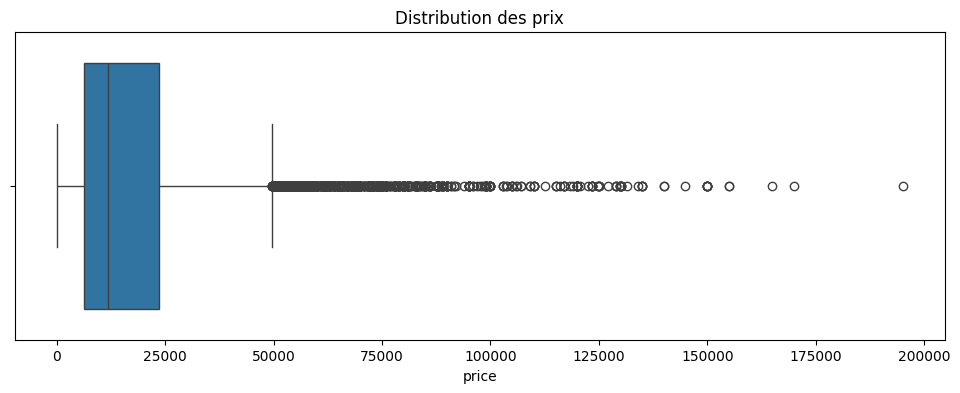

In [75]:
# Cellule 7 : Répartition des prix (boxplot pour visualiser les outliers)
plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x='price')
plt.title("Distribution des prix")
plt.show()

/var/folders/wy/rtgtjq8x4sj_5mc5m0zvsgc40000gp/T/ipykernel_52217/1579550069.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df[df['manufacturer'].isin(top_manu)],


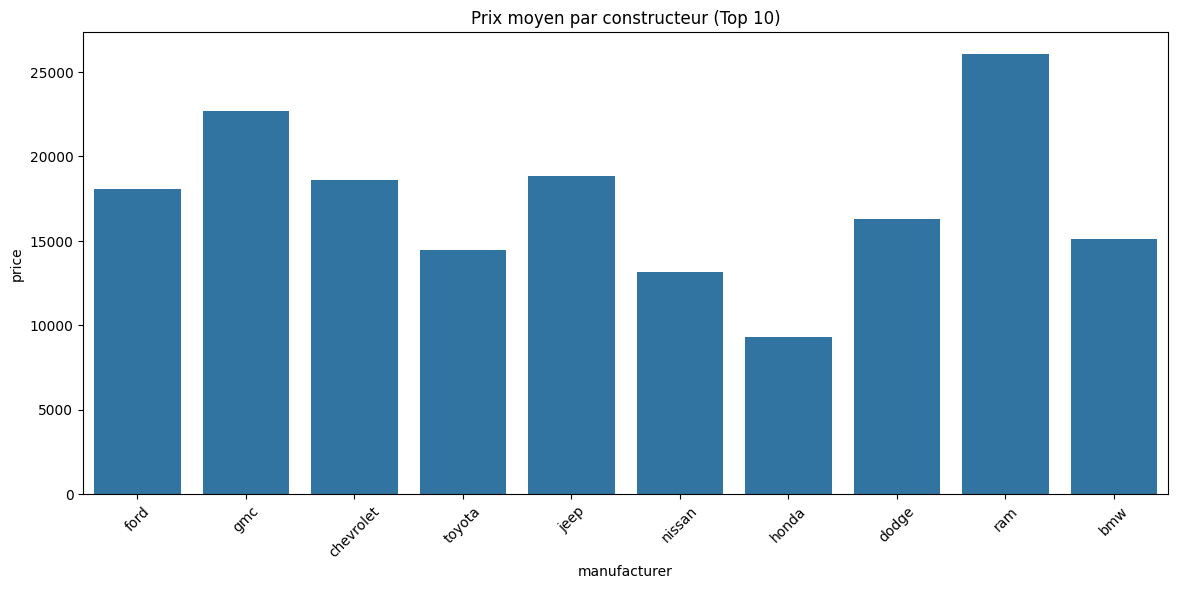

In [76]:
# Cellule 8 : Prix moyen par constructeur
plt.figure(figsize=(14, 6))
top_manu = df['manufacturer'].value_counts().head(10).index
sns.barplot(data=df[df['manufacturer'].isin(top_manu)],
            x='manufacturer', y='price', ci=None)
plt.title("Prix moyen par constructeur (Top 10)")
plt.xticks(rotation=45)
plt.show()

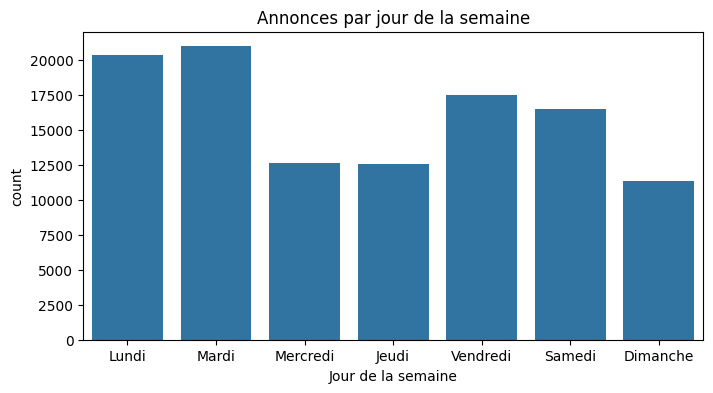

In [77]:
# Cellule 9 : Volume d'annonces par jour de la semaine
days = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
plt.figure(figsize=(8, 4))
sns.countplot(x='weekday_posted', data=df)
plt.title("Annonces par jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.xticks(ticks=range(7), labels=days)
plt.show()

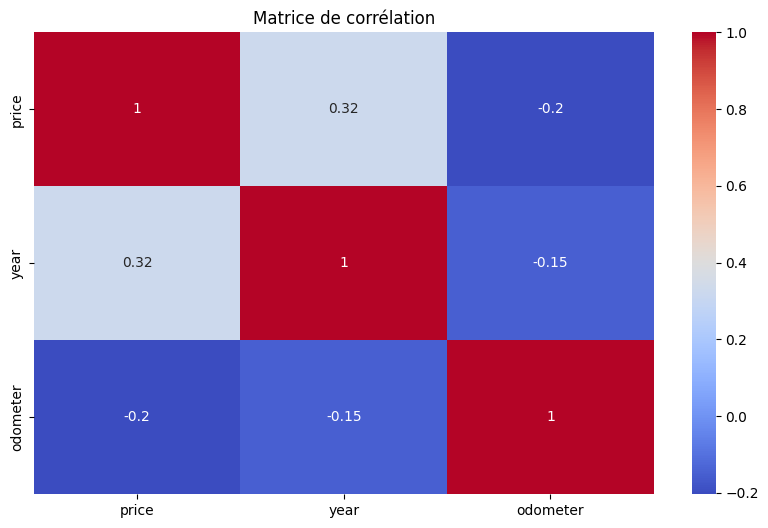

In [78]:
# Cellule 10 : Corrélation entre les variables numériques
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()